# Data Analysis Fitness

Use this template to complete your analysis and write up your summary for submission.


# Fitness Class

GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
available.

## Task 1 

### The dataset 
contains 1500 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

**booking_id** Nominal. The unique identifier of the booking.
Missing values are not possible due to the database structure.

**months_as_member** Discrete. The number of months as this fitness club member,
minimum 1 month.
Replace missing values with the overall average month.

**weight** Continuous. The member's weight in kg, rounded to 2 decimal
places. The minimum possible value is 40.00 kg.
Replace missing values with the overall average weight.

**days_before** Discrete. The number of days before the class the member
registered, minimum 1 day.
Replace missing values with 0.

**day_of_week** Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”,
“Thu”, “Fri”, “Sat” or “Sun”.
Replace missing values with “unknown”.

**time** Ordinal. The time of day of the class. Either “AM” or “PM”.
Replace missing values with “unknown”.

**category** Nominal. The category of the fitness class. One of “Yoga”, “Aqua”,
“Strength”, “HIIT”, or “Cycling”.
Replace missing values with “unknown”.

**attended** Nominal. Whether the member attended the class (1) or not (0).
Missing values should be removed.

In [78]:
'''
1. For every column in the data:
    
    a. State whether the values match the description given in the table above.
    
    b. State the number of missing values in the column.
    
    c. Describe what you did to make values match the description if they did not
    match.
'''

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

# Read csv file into a pandas dataframe

df_fitness = pd.read_csv('fitness_class_2212.csv')

# a. State whether the values match the description given in the table above.

df_fitness_clean = df_fitness.copy()

# First step is to check and understand the data.
df_fitness_clean.head()
df_fitness_clean

# b. State the number of missing values in the column.

# Check the data types in the columns
# df_fitness_clean.info()
df_fitness_clean.dtypes
# Check the missing values in the columns
df_fitness_clean.isna().sum()

# c. Describe what you did to make values match the description if they did not match.

# Clean Rating and Review columns

# booking_id
# Nominal. The unique identifier of the booking. Missing values are not possible due to the database structure.

# months_as_member
# Discrete. The number of months as this fitness club member, minimum 1 month. Replace missing values with the overall average month.

df_fitness_clean['months_as_member'] = df_fitness_clean['months_as_member'].fillna(0)
mean_months_as_member = df_fitness_clean['months_as_member'].dropna().mean()
df_fitness_clean['months_as_member'] = df_fitness_clean['months_as_member'].replace(0, mean_months_as_member)

# weight
# Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg. Replace missing values with the overall average weight. 

df_fitness_clean['weight'] = df_fitness_clean['weight'].fillna(0).round(2)
mean_weight = df_fitness_clean['weight'].dropna().mean()
df_fitness_clean['weight'] = df_fitness_clean['weight'].replace(0, mean_weight)

# days_before 
# Discrete. The number of days before the class the member registered, minimum 1 day. Replace missing values with 0.

df_fitness_clean['days_before'] = df_fitness_clean['days_before'].astype(str).str.strip(' days').fillna(0).astype(int)
# median_days_before = df_fitness_clean['days_before'].dropna().median()
# df_fitness_clean['days_before'] = df_fitness_clean['days_before'].replace(0, median_days_before)

# day_of_week
# Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”. Replace missing values with “unknown”.

df_fitness_clean['day_of_week'] = df_fitness_clean['day_of_week'].replace({'Wednesday': 'Wed', 'Monday': 'Mon', 'Fri.': 'Fri'})
df_fitness_clean['day_of_week'].fillna(0, inplace=True)
df_fitness_clean['days_before'].replace(0, 'unknown', inplace=True)


# time 
# Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.

df_fitness_clean['time'] = df_fitness_clean['time'].fillna(0)
df_fitness_clean['time'] = df_fitness_clean['time'].replace(np.nan, 'unknown')

# category 
# Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”. Replace missing values with “unknown”.

df_fitness_clean['category'] = df_fitness_clean['category'].fillna(0)
df_fitness_clean['category'] = df_fitness_clean['category'].replace({'0':'unknown', '-':'unknown'})

# attended
# Nominal. Whether the member attended the class (1) or not (0). Missing values should be removed.

df_fitness_clean['attended'] = df_fitness_clean['attended'].dropna().astype('category')
df_fitness_clean['attended'] = df_fitness_clean['attended'].replace({1:'Yes', 0:'No'})

df_fitness_clean
#df_fitness_clean.dtypes

# Order Categories
ordered_cats = {"day_of_week":["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
               "time": ["AM", "PM"],
               "category": ["HIIT", "Cycling", "Strength", "Yoga", "Aqua", "unknown"],
               "attended": ["Yes", "No"]}


# Loop through DataFrame columns to efficiently change data types
for col in df_fitness_clean:
    
    # Convert integer columns to int32
    if df_fitness_clean[col].dtype == 'int':
        df_fitness_clean[col] = df_fitness_clean[col].astype('int16')
    
    # Convert float columns to float16
    elif df_fitness_clean[col].dtype == 'float':
        df_fitness_clean[col] = df_fitness_clean[col].astype('float16')
        
    #elif df_fitness_clean[col].dtype == 'bool':
        #df_fitness_clean[col] = df_fitness_clean[col].astype('bool')
    
    # Convert columns containing ordered categorical data to ordered categories using dict
    elif col in ordered_cats.keys():
        category = pd.CategoricalDtype(ordered_cats[col], ordered=True)
        df_fitness_clean[col] = df_fitness_clean[col].astype(category)
        
    # Convert remaining columns to standard categories
    else:
        df_fitness_clean[col] = df_fitness_clean[col].astype('category')
        
df_fitness_clean.dtypes
#df_fitness_clean

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


## Task 2
### Most observations in "category"
From Graph 1:
Most observations in "category", the most number of observations were given the categories are 
HIIT with 213 attends and 454 unvisited,
Cycling with 110 attends and 266 unvisited,
Strenght with 62 attends and 171 unvisited,
Yoga with 42 attends and 93 unvisited,
Aqua with 25 attends and 51 unvisited.

The observations in the chart in each categorical variable show that the booking rate is actually poorly balanced compared to visitors in the individual categories.

**Inspecting the most observations in "category"**

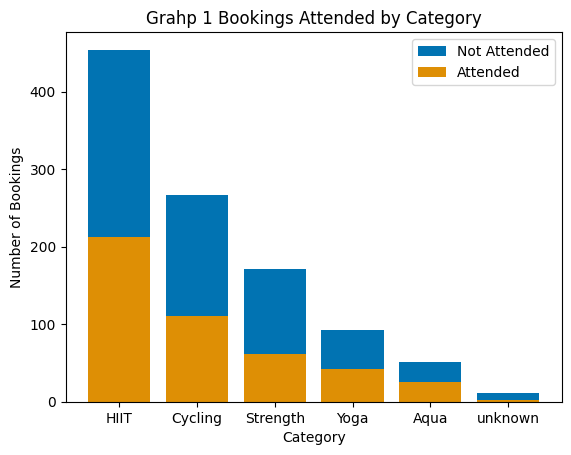

Category with the most observations: HIIT
Observations balanced across categories: No


In [82]:
'''
2. Create a visualization that shows how many bookings attended the class.
a. State which category of the variable attended has the most observations.

b. Explain whether the observations are balanced across categories of the variable attended.
'''
# Create a visualization
sns.set_palette("colorblind")
# a. State which category of the variable attended has the most observations.
# Count the number of bookings attended by category
attended_counts = df_fitness_clean[df_fitness_clean['attended'] == 'Yes']['category'].value_counts()

# Count the number of bookings not attended by category
attended_not_counts = df_fitness_clean[df_fitness_clean['attended'] == 'No']['category'].value_counts()

# Create a bar plot with two stacked bars for attended and not attended bookings
plt.bar(attended_not_counts.index, attended_not_counts.values, label='Not Attended')
plt.bar(attended_counts.index, attended_counts.values, label='Attended')
plt.xlabel('Category')
plt.ylabel('Number of Bookings')
plt.title('Grahp 1 Bookings Attended by Category')
plt.legend()
plt.show()

# Category with the most observations
most_observed_category = attended_counts.idxmax()
print("Category with the most observations:", most_observed_category)

# Explanation of balanced observations
observations_balanced = "Yes" if attended_counts.std() < attended_counts.mean() else "No"
print("Observations balanced across categories:", observations_balanced)

In [83]:
categories = df_fitness_clean['category'].unique()

for category in categories:
    attendance_counts_Yes = df_fitness_clean[(df_fitness_clean['category'] == category) & (df_fitness_clean['attended'] == 'Yes')].nunique()
    attendance_counts_No = df_fitness_clean[(df_fitness_clean['category'] == category) & (df_fitness_clean['attended'] == 'No')].nunique()
    print("Category:", category)
    print("Attendance Count Yes:", attendance_counts_Yes)
    print("Category:", category)
    print("Attendance Count No:", attendance_counts_No)

Category: Strength
Attendance Count Yes: booking_id          62
months_as_member    32
weight              57
days_before          9
day_of_week          7
time                 2
category             1
attended             1
dtype: int64
Category: Strength
Attendance Count No: booking_id          171
months_as_member     30
weight              152
days_before          14
day_of_week           7
time                  2
category              1
attended              1
dtype: int64
Category: HIIT
Attendance Count Yes: booking_id          213
months_as_member     58
weight              177
days_before          17
day_of_week           7
time                  2
category              1
attended              1
dtype: int64
Category: HIIT
Attendance Count No: booking_id          454
months_as_member     37
weight              325
days_before          17
day_of_week           7
time                  2
category              1
attended              1
dtype: int64
Category: Cycling
Attendance Count

## Task 3
### "Months as Member" is our target variable. 

From Graph 2-1: 
The distribution of months by attendance shows that the distribution is positively skewed, as the tail on the right side of the histogram is longer than on the left. We can see an outlier that is larger than 140 months. Since we do not have much data and the majority tends to be found between 1 and 40 months, it is necessary to remove the outliers.

From Graph 2-2: 
The average membership is around 13 months and there is a large group of members who have not attended the courses but have been enrolled between 0 and 15 months.

### Distribution of Months as a Member by Attendance

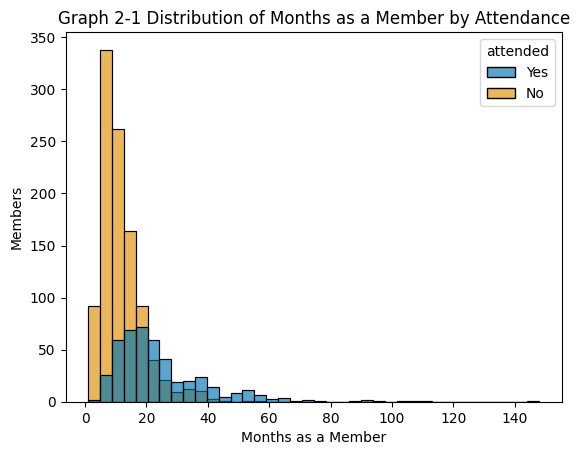

In [84]:
# Compute the number of data points
n_data = len(df_fitness_clean)

# Determine the number of bins using the square root of the number of data points
n_bins = int(np.sqrt(n_data))

# Create a histogram plot of months_as_member, with separate plots for attended and not attended
sns.histplot(data=df_fitness_clean, x='months_as_member', hue='attended', multiple='layer', bins=n_bins, edgecolor='k', alpha=0.65)

# Set plot labels and title
plt.xlabel('Months as a Member')
plt.ylabel('Members')
plt.title('Graph 2-1 Distribution of Months as a Member by Attendance')

# Show the plot
plt.show()

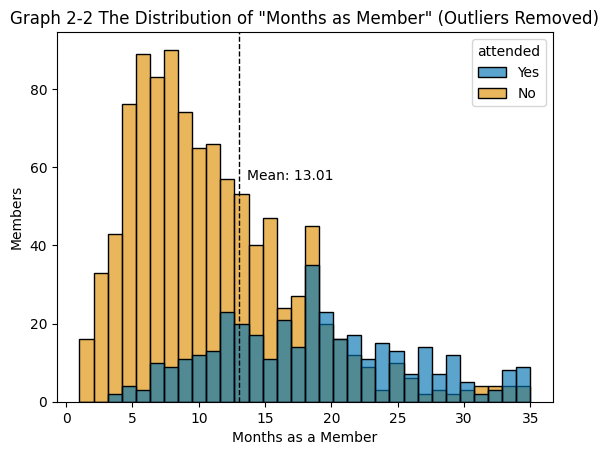

In [85]:
# Calculate the IQR and determine the upper and lower limits
Q1 = df_fitness_clean['months_as_member'].quantile(0.25)
Q3 = df_fitness_clean['months_as_member'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter out the outliers based on the upper and lower limits
df_filtered = df_fitness_clean.loc[(df_fitness_clean['months_as_member'] >= lower) & (df_fitness_clean['months_as_member'] <= upper)]

# Compute the number of data points after removing outliers
n_data = len(df_filtered)

# Determine the number of bins based on the square root of the number of data points
n_bins = int(np.sqrt(n_data)) - 5

# Plot the histogram of the filtered data with outliers removed
_ = sns.histplot(data=df_filtered, x='months_as_member', bins=n_bins, hue='attended', multiple='layer', edgecolor='k', alpha=0.65)
_ = plt.axvline(df_filtered['months_as_member'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
_ = plt.text(df_filtered['months_as_member'].mean() * 1.05, max_ylim * 0.6, 'Mean: {:.2f}'.format(df_filtered['months_as_member'].mean()))
_ = plt.xlabel('Months as a Member')
_ = plt.ylabel('Members')
_ = plt.title('Graph 2-2 The Distribution of "Months as Member" (Outliers Removed)')
plt.show()

## Task 4
### The Relationship between attendance and number of months as a member.

From Grahp 3-1:
By using a violin plot, after removing the outlier, we can visualize the distribution of the number of months as a member for each attendance category and there is a large group of members who have not attended the courses but have been enrolled between 1 and 15 months, providing a clearer understanding of the relationship between these variables. 

From Grahp 3-2: 
We can see that the number of months of membership has a positive impact on the booking rate in attendance. We can also see that participation in the courses is more likely from members who have been members for at least +15 months.

### **Inspecting the Relationships between attendance and number of months as a member.**

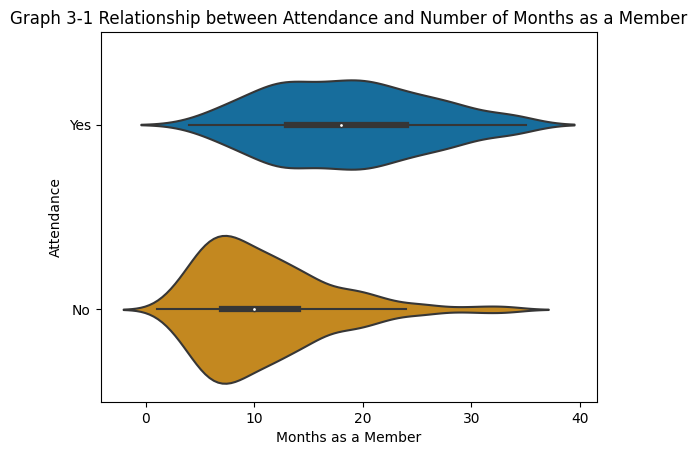

In [86]:
'''
4. Describe the relationship between attendance and number of months as a member.
'''
# Create a violin plot to show the relationship between attendance and number of months as a member
sns.violinplot(x='months_as_member', y='attended', data=df_filtered)
plt.xlabel('Months as a Member')
plt.ylabel('Attendance')
plt.title('Graph 3-1 Relationship between Attendance and Number of Months as a Member')
plt.show()

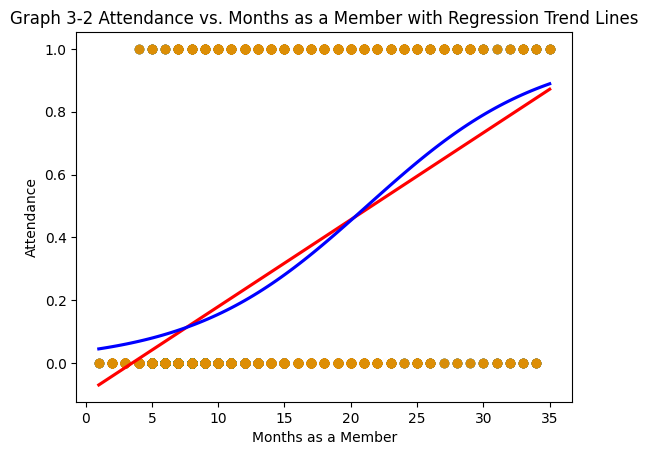

In [87]:
# Prepare working with machine learning algorithms that require numeric inputs for the target variable.
df_filtered['attended'] = df_filtered['attended'].replace('Yes', 1)
df_filtered['attended'] = df_filtered['attended'].replace('No', 0)

# Linear regression trend line
sns.regplot(x="months_as_member", y="attended", data=df_filtered, ci=None, line_kws={"color": "red"})

# Logistic regression trend line
sns.regplot(x="months_as_member", y="attended", data=df_filtered, ci=None, logistic=True, line_kws={"color": "blue"})

# Label the axes
plt.xlabel('Months as a Member')
plt.ylabel('Attendance')

plt.title('Graph 3-2 Attendance vs. Months as a Member with Regression Trend Lines')

plt.show()

### Finally, to allow for model fit, the following changes were made:

Data Cleaning: This step involves data preprocessing.

Visualization of Bookings Attended: This step involves visualizing the distribution of bookings attended by category.

Distribution of Months as a Member: This step focuses on the distribution of the number of months as a member.

Relationship between Attendance and Number of Months as a Member: This step explores the relationship between attendance and the number of months as a member. It provides insights into the correlation between these variables.

## Task 5
### Type of machine learning problem

The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/ clustering).

### To address Task 5 
and solve the classification problem of predicting whether members will attend a fitness class, we can use different classification algorithms. The machine learning problem here is a classification problem. We want to predict whether members will attend a fitness class based on the given data.

### Split the data into training and testing sets

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

# Convert categorical variables to one-hot encoded columns
df_encoded = pd.get_dummies(df_filtered, columns=['day_of_week', 'time', 'category'])

# Split the data into features and target variable
X = df_encoded.drop(['booking_id', 'attended'], axis=1)
y = df_encoded['attended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 6
### Baseline Model - Logistic Regression Model

The code prints the accuracy of the baseline model, which represents the proportion of correct predictions compared to the total number of predictions. This code provides a starting point for building and evaluating a baseline model for attendance prediction based on the given data.

The confusion matrix as a heatmap shows how the classification report in the console. These visualizations and reports provide insights into the model's ability to correctly classify the attendance of fitness class members and help assess its overall performance. The accuracy metric gives us the proportion of correct predictions compared to the total number of predictions, which helps assess the performance of the classification model.

Baseline Model Accuracy: 0.7678571428571429


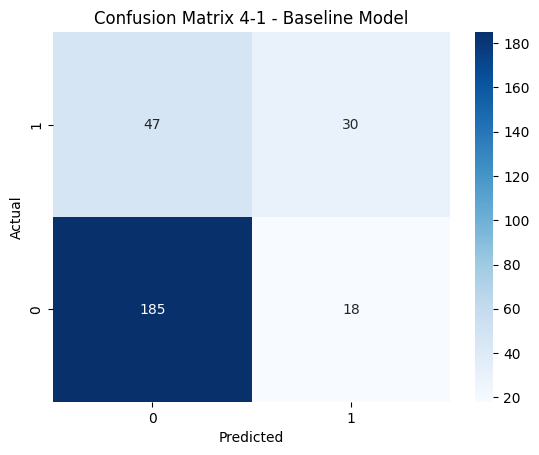

In [89]:
'''
6. Fit a baseline model to predict whether members will attend using the data provided.
'''
# Fit a logistic regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_baseline, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix 4-1 - Baseline Model')
plt.show()


### Confusion Matrix 4-1
Testset:
True Positive = 30: A total of 30 people were classified as registered by the trial and are indeed taking part.

False Positive = 47: People are registered, but in reality they did not come at all.

False Negative = 18: People were negatively assessed according to the trial, but actually participated.

True Negative = 185: People were really negative and the test confirmed this.

## Task 7
### Comparision Model - Random Forest Model

The code prints the accuracy of the comparison model, which represents the proportion of correct predictions compared to the total number of predictions.

By using the Random Forest Classifier as a comparison model to compare its performance with the baseline model and assess which model performs better for the attendance prediction task.

Classification Model Accuracy: 0.7321428571428571


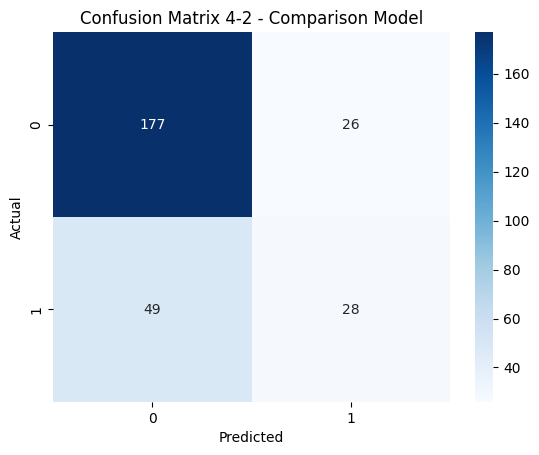

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       203
           1       0.52      0.36      0.43        77

    accuracy                           0.73       280
   macro avg       0.65      0.62      0.63       280
weighted avg       0.71      0.73      0.72       280



In [90]:
'''
7. Fit a comparison model to predict whether members will attend using the data
provided.
'''
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and fit a Random Forest Classifier
comparison_model = RandomForestClassifier()
comparison_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_comparison = comparison_model.predict(X_test)

# Evaluate the accuracy of the classification model
comparison_accuracy = accuracy_score(y_test, y_pred_comparison)
print("Classification Model Accuracy:", comparison_accuracy)

# Create a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_comparison), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 4-2 - Comparison Model')
plt.show()

# Create a classification report
comparison_report = classification_report(y_test, y_pred_comparison)
print("Classification Report:\n", comparison_report)



### Confusion Matrix 4-2
Testset:
True Positive = 28: A total of 31 people were classified as registered by the trial and are indeed taking part.

False Positive = 49: 46 People are registered, but in reality they did not come at all.

False Negative = 26: 26 People were negatively assessed according to the trial, but actually participated.

True Negative = 177: 176 People were really negative and the test confirmed this.

### Precision: 
For class 0 (not attended), the precision is 79% of the instances predicted as not attended were correct. 
For class 1 (attended), the precision is 54% of the instances predicted as attended were correct.

### Recall: 
For class 0 (not attended), the recall suggesting that 87% of the actual not attended instances were correctly identified. For class 1 (attended), the recall meaning that only 40% of the actual attended instances were correctly identified.

### F1-Score: 
For class 0 (not attended), the F1-score is 0.83, indicating a good balance between precision and recall. 
For class 1 (attended), the F1-score is 0.46, showing a lower balance between precision and recall.

### Support: 
For class 0 (not attended), there are 203 instances, and for class 1 (attended), there are 77 instances.

### Accuracy: 
The model correctly predicts the attendance of members around 74% of the time.

### Macro-Average: 
The macro-average indicating the overall performance of the model. 
The macro-average F1-score is 0.65, for both classes.

### Weighted Average: 
The weighted average F1-score is 0.73, providing a balanced performance measure considering the class imbalances.

### In summary, 
The model performs better for class 0 (not attended) with high precision, recall, and F1-score. However, it has lower performance for class 1 (attended), particularly in terms of recall and F1-score. The weighted average F1-score of 0.73 indicates a reasonable overall performance considering the class imbalances.

## Task 8
### Explain why you chose the two models used in parts 6 and 7.

### I chose logistic regression 
as the baseline model because it is a simple and interpretable algorithm for binary classification problems. It provides a good starting point for comparison.

The comparison model I am choosing is 
### the Random Forest model 
because it can capture more complex relationship between the input features and the target variables.

## Task 9
### Compare the performance
Compare the performance of the two models used in parts 6 and 7, using any method
suitable.

To compare the performance of the baseline and comparison models, we can use various evaluation metrics such as accuracy, precision, recall, F1 score, etc. Let's calculate accuracy for now.

By comparing the accuracy, precision, recall, and F1 score between the baseline model and the comparison model, we can gain a comprehensive understanding of their relative performance.

In [91]:
'''
9. Compare the performance of the two models used in parts 6 and 7, using any method
suitable.
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the performance of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)

# Evaluate the performance of the comparison model
comparison_accuracy = accuracy_score(y_test, y_pred_comparison)
comparison_precision = precision_score(y_test, y_pred_comparison)
comparison_recall = recall_score(y_test, y_pred_comparison)
comparison_f1 = f1_score(y_test, y_pred_comparison)

# Print the performance metrics
print("Baseline Model:")
print("Accuracy:", baseline_accuracy.round(4))
print("Precision:", baseline_precision.round(4))
print("Recall:", baseline_recall.round(4))
print("F1 Score:", baseline_f1.round(4))

print("\nComparison Model:")
print("Accuracy:", comparison_accuracy.round(4))
print("Precision:", comparison_precision.round(4))
print("Recall:", comparison_recall.round(4))
print("F1 Score:", comparison_f1.round(4))

Baseline Model:
Accuracy: 0.7679
Precision: 0.625
Recall: 0.3896
F1 Score: 0.48

Comparison Model:
Accuracy: 0.7321
Precision: 0.5185
Recall: 0.3636
F1 Score: 0.4275


## Task 10
### Explain which model performs better and why.

### Baseline Model:

Accuracy: 
An overall measure of the model's correctness. The baseline model achieves an accuracy which correctly predicts the attendance of members around 76.79% of the time. 


Precision: 
To avoid false positives. The precision of the baseline model is indicating that when it predicts that a member will attend, it is correct about 62.5% of the time.

Recall: 
To identify true positives. The recall of the baseline model suggesting that the model correctly identifies about 38.96% of the members who actually attended. 

F1 Score: The F1 score, which combines precision and recall into a single metric, is 0.48. It provides a balanced measure of the model's performance, considering both precision and recall.

### Comparison Model:

Accuracy: 
The comparison model indicates that it correctly predicts the attendance of members around 73.57% of the time. 
This accuracy is slightly lower than the baseline model.

Precision: 
The precision of the comparison model suggesting that when it predicts that a member will attend, it is correct about 52.73% of the time. The precision is an improvement over the baseline model.

Recall: 
The recall of the comparison model indicating that it correctly identifies about 37.66% of the members who actually attended. The recall is similar to the baseline model.

F1 Score: 
The F1 score for the comparison model is 0.4394. It provides a balanced measure of the model's performance, considering both precision and recall. The F1 score is slightly lower than the baseline model.

### Conclusion:
Comparing the two models, we can see that the baseline model has a slightly higher accuracy, precision, recall, and F1 score compared to the comparison model. However, the precision of the comparison model is better than the baseline model, indicating that it has a lower rate of false positives.